# Amazon Sentiment Analysis

This notebook will show my work on a sentiment analysis of amazon product reviews. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# import dataset
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


## Data Cleaning

In [3]:
#drop unnecesary columns

df_clean = df[['id', 'dateAdded', 'dateUpdated', 'name', 'brand', 
               'categories', 'primaryCategories', 'reviews.rating', 'reviews.text', 
               'reviews.title', 'reviews.username']]

df_clean.head()

,id,dateAdded,dateUpdated,name,brand,categories,primaryCategories,reviews.rating,reviews.text,reviews.title,reviews.username
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda


In [4]:
#convert reviews.text to string
df['reviews.text'] = df['reviews.text'].astype('str') 

I think it may also be useful to create columns with some usefull information, such as word count. 

In [5]:
df_clean['text_word_count'] = df_clean['reviews.text'].str.split().str.len()
df_clean['title_word_count'] = df_clean['reviews.title'].str.split().str.len()

/Users/adithyansubramanian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/adithyansubramanian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
df_clean.head()

,id,dateAdded,dateUpdated,name,brand,categories,primaryCategories,reviews.rating,reviews.text,reviews.title,reviews.username,text_word_count,title_word_count
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,31,20
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,13,11
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,12,11
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,14,11
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,10,10


## Exploratory Data Analysis

In [7]:
df_clean.describe()

,reviews.rating,text_word_count,title_word_count
count,28332.000000,28332.000000,28332.000000
mean,4.514048,25.945009,3.656749
std,0.934957,37.075899,2.614603
min,1.000000,1.000000,1.000000
25%,4.000000,10.000000,2.000000
50%,5.000000,17.000000,3.000000
75%,5.000000,31.000000,5.000000
max,5.000000,1539.000000,28.000000


To start, let us look at the distribution of the review ratings. 

Text(0, 0.5, 'Number of Reviews')

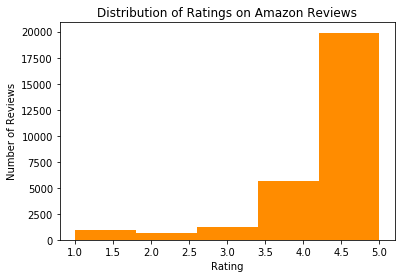

In [8]:
plt.hist(df_clean['reviews.rating'], bins=5, color='darkorange')
plt.title('Distribution of Ratings on Amazon Reviews')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

There is a very strong left skew. This may have an effecrt on our final model, but for now let us proceed as normal. Let us take a look at the distributions of the word counts of the reviews and titles and see if there is any information there. 

In [9]:
df_clean["title_word_count"].describe()

count    28332.000000
mean         3.656749
std          2.614603
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         28.000000
Name: title_word_count, dtype: float64

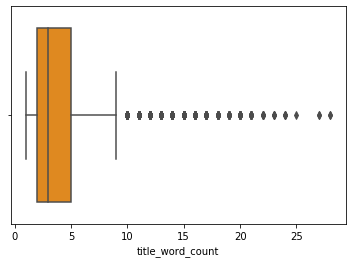

In [10]:
sns.boxplot(x=df_clean["title_word_count"], palette=['darkorange'])

In [11]:
#Find number of reviews for each category

df_clean['categories'].value_counts()

AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batteries & Chargers,Health, Household & Baby Care,Health Personal Care                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           8343
AA,AAA,Electronics Features,Health,Electronics,Health

The vast majority of these reviews are reviews for electronics. A further step to this project could be finding more review data for non electronic merchandise and see how the reviews change. 

In [12]:
df_clean['name'].value_counts()

AmazonBasics AAA Performance Alkaline Batteries (36 Count)                               8343
AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary           3728
Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers        2443
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black    2370
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case                   1676
                                                                                         ... 
Two Door Top Load Pet Kennel Travel Crate Dog Cat Pet Cage Carrier Box Tray 23"             1
AmazonBasics Silicone Hot Handle Cover/Holder - Red                                         1
Echo Dot (Previous generation)                                                              1
Amazon Echo Show - Black                                                                    1
AmazonBasics Nespresso Pod Storage Drawer - 50 Capsule Capac

In [13]:
pri_cat = df_clean['primaryCategories'].value_counts()
pri_cat = pri_cat.rename_axis('Primary_Categories').reset_index(name='counts')

Text(0.5, 0, 'Category')

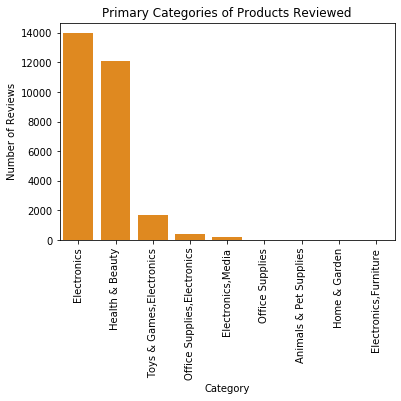

In [14]:
sns.barplot(x= 'Primary_Categories', y = 'counts', data = pri_cat, palette = ['darkorange'])
plt.xticks(rotation='vertical')
plt.title('Primary Categories of Products Reviewed')
plt.ylabel('Number of Reviews')
plt.xlabel('Category')

As before, the vast majority of the reviews are for electronic items. 

### Initial preprocessing

To start we are going to get rid of all stop words and any character that is not an alphabet letter (i.e pronounciation, numbers etc.)

In [15]:
#Start by converting the text to all lowercase letters

df_clean['reviews.text'] = df_clean['reviews.text'].str.lower()

#Now get rid of any numbers

df_clean['reviews.text'] = df_clean['reviews.text'].str.replace('\d+', '')

#Get rid of periods and commas

df_clean['reviews.text'] = df_clean['reviews.text'].str.replace('.', '')
df_clean['reviews.text'] = df_clean['reviews.text'].str.replace(',', '')

/Users/adithyansubramanian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/adithyansubramanian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/adithyansubramanian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adithyansubramanian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
from nltk.tokenize import sent_tokenize

df_clean['tokenized_sentence_text'] = df_clean['reviews.text'].apply(sent_tokenize)

/Users/adithyansubramanian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
from nltk.tokenize import word_tokenize

df_clean['tokenized_word_text'] = df_clean['reviews.text'].apply(word_tokenize)

/Users/adithyansubramanian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
df_clean.head()

,id,dateAdded,dateUpdated,name,brand,categories,primaryCategories,reviews.rating,reviews.text,reviews.title,reviews.username,text_word_count,title_word_count,tokenized_sentence_text,tokenized_word_text
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,3,i order of them and one of the item is bad qu...,... 3 of them and one of the item is bad quali...,Byger yang,31,20,[i order of them and one of the item is bad q...,"[i, order, of, them, and, one, of, the, item, ..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,4,bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,13,11,[bulk is always the less expensive way to go f...,"[bulk, is, always, the, less, expensive, way, ..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,well they are not duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,12,11,[well they are not duracell but for the price ...,"[well, they, are, not, duracell, but, for, the..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,14,11,[seem to work as well as name brand batteries ...,"[seem, to, work, as, well, as, name, brand, ba..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,these batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,10,10,[these batteries are very long lasting the pri...,"[these, batteries, are, very, long, lasting, t..."


In [20]:
#now let us get rid of stop words 

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adithyansubramanian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords
#set stop words
stop_words = set(stopwords.words('english'))

In [22]:
df_clean['nostop'] = df_clean['tokenized_word_text']

/Users/adithyansubramanian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_clean['nostop'] = df_clean['reviews.text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

/Users/adithyansubramanian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df_clean.head()

,id,dateAdded,dateUpdated,name,brand,categories,primaryCategories,reviews.rating,reviews.text,reviews.title,reviews.username,text_word_count,title_word_count,tokenized_sentence_text,tokenized_word_text,nostop
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,3,i order of them and one of the item is bad qu...,... 3 of them and one of the item is bad quali...,Byger yang,31,20,[i order of them and one of the item is bad q...,"[i, order, of, them, and, one, of, the, item, ...",order one item bad quality missing backup spri...
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,4,bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,13,11,[bulk is always the less expensive way to go f...,"[bulk, is, always, the, less, expensive, way, ...",bulk always less expensive way go products like
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,well they are not duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,12,11,[well they are not duracell but for the price ...,"[well, they, are, not, duracell, but, for, the...",well duracell price happy
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,14,11,[seem to work as well as name brand batteries ...,"[seem, to, work, as, well, as, name, brand, ba...",seem work well name brand batteries much bette...
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,these batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,10,10,[these batteries are very long lasting the pri...,"[these, batteries, are, very, long, lasting, t...",batteries long lasting price great


In [25]:
df_clean['tokenized_word_no_stop'] = df_clean['nostop'].apply(word_tokenize)

/Users/adithyansubramanian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df_clean.head()

,id,dateAdded,dateUpdated,name,brand,categories,primaryCategories,reviews.rating,reviews.text,reviews.title,reviews.username,text_word_count,title_word_count,tokenized_sentence_text,tokenized_word_text,nostop,tokenized_word_no_stop
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,3,i order of them and one of the item is bad qu...,... 3 of them and one of the item is bad quali...,Byger yang,31,20,[i order of them and one of the item is bad q...,"[i, order, of, them, and, one, of, the, item, ...",order one item bad quality missing backup spri...,"[order, one, item, bad, quality, missing, back..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,4,bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,13,11,[bulk is always the less expensive way to go f...,"[bulk, is, always, the, less, expensive, way, ...",bulk always less expensive way go products like,"[bulk, always, less, expensive, way, go, produ..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,well they are not duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,12,11,[well they are not duracell but for the price ...,"[well, they, are, not, duracell, but, for, the...",well duracell price happy,"[well, duracell, price, happy]"
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,14,11,[seem to work as well as name brand batteries ...,"[seem, to, work, as, well, as, name, brand, ba...",seem work well name brand batteries much bette...,"[seem, work, well, name, brand, batteries, muc..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,these batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,10,10,[these batteries are very long lasting the pri...,"[these, batteries, are, very, long, lasting, t...",batteries long lasting price great,"[batteries, long, lasting, price, great]"


In [27]:
df_clean['text_word_count'] = df_clean['nostop'].str.split().str.len()

/Users/adithyansubramanian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_clean.head()

,id,dateAdded,dateUpdated,name,brand,categories,primaryCategories,reviews.rating,reviews.text,reviews.title,reviews.username,text_word_count,title_word_count,tokenized_sentence_text,tokenized_word_text,nostop,tokenized_word_no_stop
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,3,i order of them and one of the item is bad qu...,... 3 of them and one of the item is bad quali...,Byger yang,14,20,[i order of them and one of the item is bad q...,"[i, order, of, them, and, one, of, the, item, ...",order one item bad quality missing backup spri...,"[order, one, item, bad, quality, missing, back..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,4,bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,8,11,[bulk is always the less expensive way to go f...,"[bulk, is, always, the, less, expensive, way, ...",bulk always less expensive way go products like,"[bulk, always, less, expensive, way, go, produ..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,well they are not duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,4,11,[well they are not duracell but for the price ...,"[well, they, are, not, duracell, but, for, the...",well duracell price happy,"[well, duracell, price, happy]"
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,9,11,[seem to work as well as name brand batteries ...,"[seem, to, work, as, well, as, name, brand, ba...",seem work well name brand batteries much bette...,"[seem, work, well, name, brand, batteries, muc..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,these batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,5,10,[these batteries are very long lasting the pri...,"[these, batteries, are, very, long, lasting, t...",batteries long lasting price great,"[batteries, long, lasting, price, great]"


In [29]:
df_clean['text_word_count'].describe()

count    28332.000000
mean        13.177432
std         18.094594
min          0.000000
25%          5.000000
50%          9.000000
75%         15.000000
max        719.000000
Name: text_word_count, dtype: float64

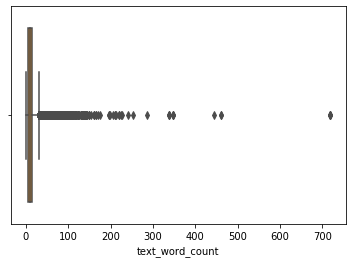

In [30]:
sns.boxplot(x=df_clean["text_word_count"], palette=['darkorange'])

There are a lot of outliers which is making it hard to fully visualize the distribution.

In [31]:
#Get rid of outliers in the text word count column

no_out = df_clean["text_word_count"][df_clean["text_word_count"].between(df_clean["text_word_count"].quantile(.15), 
                                                                         df_clean["text_word_count"].quantile(.95))] 

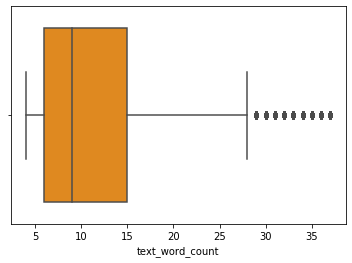

In [32]:
sns.boxplot(x=no_out, palette=['darkorange'])

In [33]:
#plot the distributions of word counts based on rating

#seperate by rating
five = df_clean[df_clean['reviews.rating'] == 5]
four = df_clean[df_clean['reviews.rating'] == 4]
three = df_clean[df_clean['reviews.rating'] == 3]
two = df_clean[df_clean['reviews.rating'] == 2]
one = df_clean[df_clean['reviews.rating'] == 1]

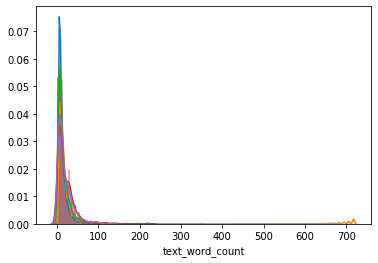

In [34]:
#plot distributions

sns.distplot(five['text_word_count'])
sns.distplot(four['text_word_count'])
sns.distplot(three['text_word_count'])
sns.distplot(two['text_word_count'])
sns.distplot(one['text_word_count'])
plt.show()


In [35]:
#Get rid of outliers
five_no_out = five["text_word_count"][five["text_word_count"].between(five["text_word_count"].quantile(.15), 
                                                                         five["text_word_count"].quantile(.95))]
four_no_out = four["text_word_count"][four["text_word_count"].between(four["text_word_count"].quantile(.15), 
                                                                         four["text_word_count"].quantile(.95))]
three_no_out = three["text_word_count"][three["text_word_count"].between(three["text_word_count"].quantile(.15), 
                                                                         three["text_word_count"].quantile(.95))]
two_no_out = two["text_word_count"][two["text_word_count"].between(two["text_word_count"].quantile(.15), 
                                                                         two["text_word_count"].quantile(.95))]
one_no_out = one["text_word_count"][one["text_word_count"].between(one["text_word_count"].quantile(.15), 
                                                                         one["text_word_count"].quantile(.95))]

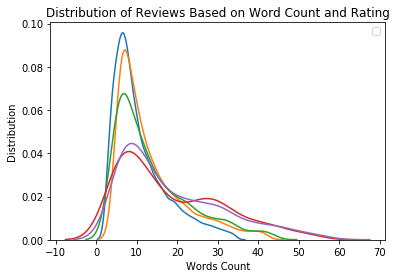

In [36]:
#plot distributions

sns.distplot(five_no_out, hist=False)
sns.distplot(four_no_out, hist=False)
sns.distplot(three_no_out, hist=False)
sns.distplot(two_no_out, hist=False)
sns.distplot(one_no_out, hist=False)
plt.legend(labels = [])
plt.ylabel('Distribution')
plt.xlabel('Words Count')
plt.title('Distribution of Reviews Based on Word Count and Rating')
plt.show()

## Initial modeling

In [37]:
# First create a train test split of the data set

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_clean["nostop"], df_clean['reviews.rating'],
                                                    test_size=0.20, random_state = 53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")

In [42]:
# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['_without_', 'aa', 'aaa', 'aaaaa', 'aaai', 'aaas', 'aas', 'abandon', 'abc', 'abcs']


In [53]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
#print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
#print(tfidf_train.A[:5])

In [54]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of count_df
#print(count_df.head())

# Print the head of tfidf_df
#print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
#print(difference)


In [49]:
# Import the necessary modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

0.7503088053643904


In [51]:
from sklearn.linear_model import LogisticRegression

# Instantiate a Logistic Regression classifier: nb_classifier
lr_classifier = LogisticRegression()

# Fit the classifier to the training data
lr_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
predlr = lr_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, predlr)
print(score)

/Users/adithyansubramanian/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/adithyansubramanian/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7748367743073937
